## Objective of the Analysis and General Approach

The objective of this analysis is to understand how different variables such as education level, income, gender, and ownership of banking products, among others, influence the level of satisfaction of banking customers.

Satisfaction is measured on a scale from 1 to 4, where 1 means “very dissatisfied” and 4 means “very satisfied”, and it is the variable we aim to explain.

To achieve this, we use three classification models in machine learning: Decision Tree, Random Forest, and Neural Network. These models help predict the satisfaction level of each customer based on their characteristics and also identify which variables are most important.

With these techniques, we are able not only to make better predictions, but also to understand which factors most strongly affect customer satisfaction, which is useful for improving service quality and customer retention in the banking sector.

---

## Exploratory Data Analysis (EDA)

To begin the analysis, the first step was to clean the data. Some columns that did not add value, such as identifiers (id, Unnamed: 0), were removed, since they only served to register each row and were not useful for the analysis.

Text variables such as gender, which appeared in different forms (“female”, “male”), were reviewed. To avoid potential errors when applying machine learning models, a new variable called gender_bin was created, assigning 0 for female and 1 for male. This allows algorithms such as decision trees and neural networks to interpret the information more easily.

Important variables were also transformed for the analysis. For example, education was treated as an ordinal variable in order to respect the hierarchy of educational levels, while satisfaction, the variable we aim to predict, was defined as categorical. This preparation was key to ensuring that the models could work correctly with the data.

Afterwards, the variables were classified according to their type, which helped organize the dataset and identify which ones would be useful for modeling.

---

## Feature Groups

Target variable

- satisfaction: indicates the customer’s satisfaction level (from 1 to 4) and was treated as a categorical variable.

Continuous numerical variables

- age  
- pincome  

Binary variables (0 or 1, where 1 indicates presence of the product or service)

- car, phone, fax, pc  
- savings1, savings2  
- creditcard1, creditcard2  
- atmcard1, atmcard2  
- cd1, cd2  
- specialchecking1, specialchecking2  
- auto.bill.payment1, auto.bill.payment2  
- personal.loans1, personal.loans2  
- mortgage1, mortgage2  
- installment.loan1, installment.loan2  
- investment.fund1, investment.fund2  
- commodities.fund1, commodities.fund2  
- annuities.fund1, annuities.fund2  
- car.insurance1, car.insurance2  
- home.insurance1, home.insurance2  
- life.insurance1, life.insurance2  
- gender_bin  

Ordinal categorical variable

- education  

Dropped variables

- id, Unnamed: 0  
- gender (replaced by gender_bin)

---

## Data Validation

In addition to this organization, logical validations were carried out to ensure data quality. Cases such as negative income values, ages outside realistic ranges (for example, below 0 or above 100), or illogical combinations such as owning a fax machine without a phone or owning a car while underage were reviewed.

It was also verified that there were no missing values. These checks ensured that the data were consistent before being used in the predictive models.

---

## Visual Exploration

Finally, a visual exploration was conducted to understand the behavior of the variables.

Boxplots were used to observe how age and income vary according to satisfaction level, and bar charts were used to explore relationships between satisfaction and other variables such as education level.

These visualizations helped identify patterns and possible hypotheses that were useful for developing the classification models.




Downloading...
From: https://drive.google.com/uc?id=1WDJQQf-Y7NSFUptLEIiHRAAOfJAM8sYj
To: /content/datos.csv
100%|██████████| 50.0k/50.0k [00:00<00:00, 9.78MB/s]


Variable respuesta: satisfaction
Variables numéricas: ['age', 'pincome']
Variables binarias: ['car', 'phone', 'fax', 'pc', 'savings1', 'savings2', 'creditcard1', 'creditcard2', 'atmcard1', 'atmcard2', 'cd1', 'cd2', 'specialchecking1', 'specialchecking2', 'auto.bill.payment1', 'auto.bill.payment2', 'personal.loans1', 'personal.loans2', 'mortgage1', 'mortgage2', 'installment.loan1', 'installment.loan2', 'investment.fund1', 'investment.fund2', 'commodities.fund1', 'commodities.fund2', 'annuities.fund1', 'annuities.fund2', 'car.insurance1', 'car.insurance2', 'home.insurance1', 'home.insurance2', 'life.insurance1', 'life.insurance2', 'gender_bin']
Variables ordinales: ['education']
Variables eliminadas: ['Unnamed: 0', 'id', 'gender']
Variables finales para los modelos: ['age', 'pincome', 'car', 'phone', 'fax', 'pc', 'savings1', 'savings2', 'creditcard1', 'creditcard2', 'atmcard1', 'atmcard2', 'cd1', 'cd2', 'specialchecking1', 'specialchecking2', 'auto.bill.payment1', 'auto.bill.payment2', '

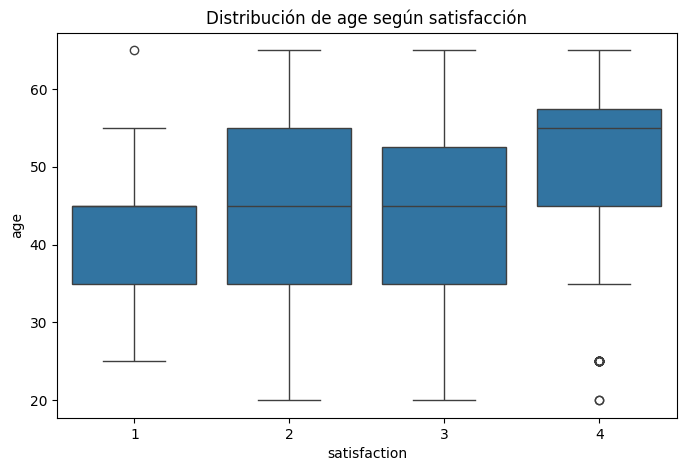

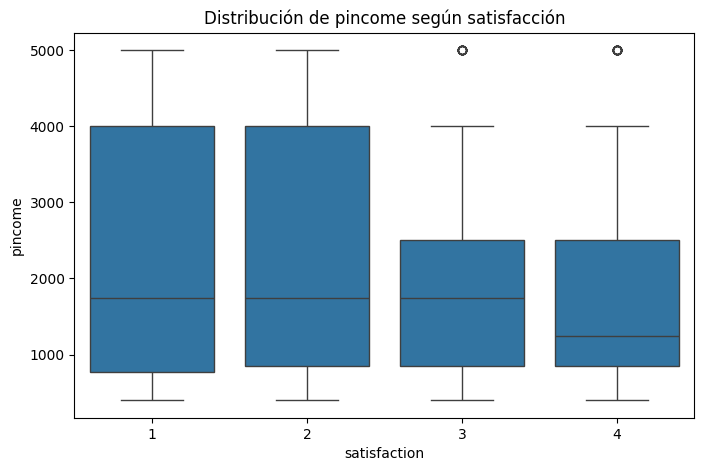

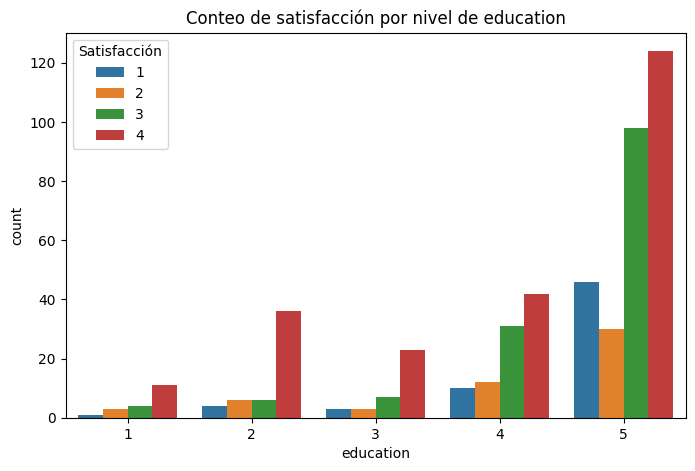

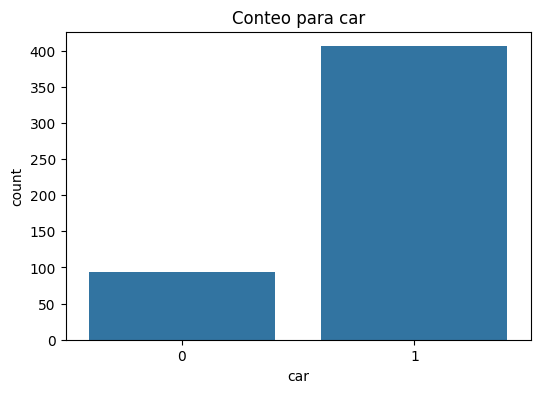

<Figure size 600x400 with 0 Axes>

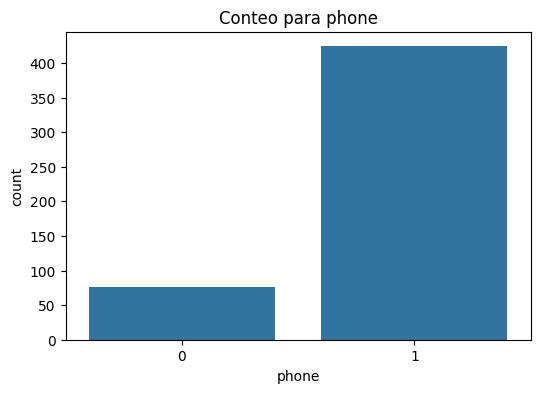

<Figure size 600x400 with 0 Axes>

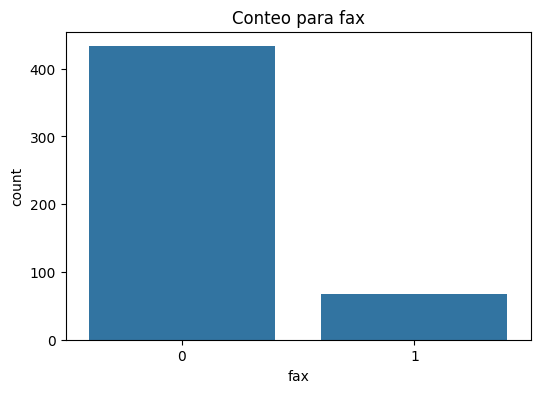

<Figure size 600x400 with 0 Axes>

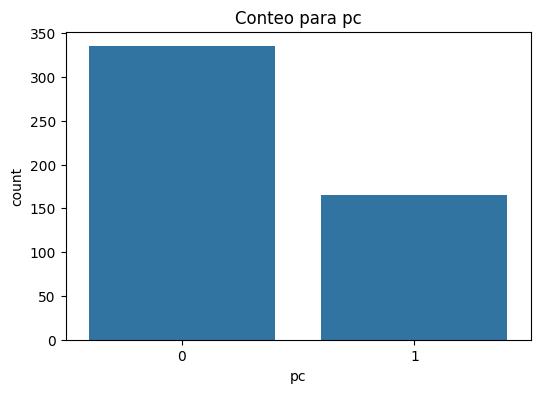

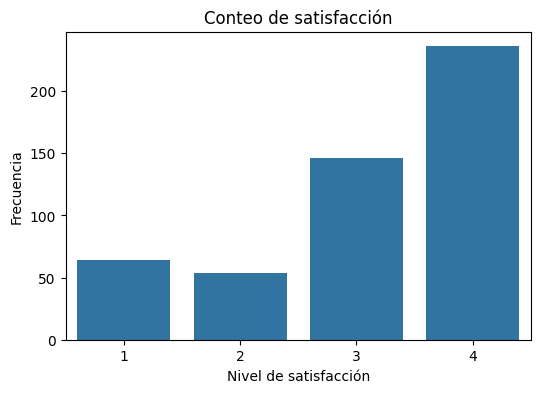

In [ ]:
# ========================================
# 1. CARGA DE LIBRERÍAS Y DATOS
# ========================================
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

# Descargar y cargar archivo
url = "https://drive.google.com/uc?id=1WDJQQf-Y7NSFUptLEIiHRAAOfJAM8sYj"
output = "datos.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv(output)

# ========================================
# 2. LIMPIEZA Y PREPARACIÓN DE VARIABLES
# ========================================

# Eliminar columnas innecesarias (identificadores)
columnas_excluir = ['Unnamed: 0', 'id']
df_analisis = df.drop(columns=columnas_excluir)

# Normalizar texto en 'gender' y crear versión binaria
df_analisis['gender'] = df_analisis['gender'].str.strip().str.lower()
df_analisis['gender_bin'] = df_analisis['gender'].map({'female': 0, 'male': 1})

# Convertir 'education' en variable ordinal categórica
orden_education = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)
df_analisis['education'] = df_analisis['education'].astype(orden_education)

# Convertir 'satisfaction' en variable categórica (target)
df_analisis['satisfaction'] = df_analisis['satisfaction'].astype('category')

# ========================================
# 3. CLASIFICACIÓN DE VARIABLES
# ========================================

# Variable objetivo (target)
target = 'satisfaction'  # Categórica

# Variables continuas (numéricas)
variables_continuas = ['age', 'pincome']

#  Variables binarias (valores 0 y 1)
variables_binarias = [
    'car', 'phone', 'fax', 'pc', 'savings1', 'savings2',
    'creditcard1', 'creditcard2', 'atmcard1', 'atmcard2',
    'cd1', 'cd2', 'specialchecking1', 'specialchecking2',
    'auto.bill.payment1', 'auto.bill.payment2', 'personal.loans1',
    'personal.loans2', 'mortgage1', 'mortgage2', 'installment.loan1',
    'installment.loan2', 'investment.fund1', 'investment.fund2',
    'commodities.fund1', 'commodities.fund2', 'annuities.fund1', 'annuities.fund2',
    'car.insurance1', 'car.insurance2', 'home.insurance1', 'home.insurance2',
    'life.insurance1', 'life.insurance2',
    'gender_bin'  # agregada manualmente
]

# Variables categóricas ordinales
variables_ordinales = ['education']

# Variables descartadas
variables_descartadas = ['Unnamed: 0', 'id', 'gender']  # ya no se usan

# ========================================
# 4. VARIABLES FINALES PARA MODELADO
# ========================================

# Variables predictoras finales que se usarán en los modelos
variables_modelo = variables_continuas + variables_binarias + variables_ordinales

print(f"Variable respuesta: {target}")
print(f"Variables numéricas: {variables_continuas}")
print(f"Variables binarias: {variables_binarias}")
print(f"Variables ordinales: {variables_ordinales}")
print(f"Variables eliminadas: {variables_descartadas}")
print(f"Variables finales para los modelos: {variables_modelo}")

###################################################

# ========================================
# 5. VALIDACIONES LÓGICAS DE CALIDAD DE DATOS
# ========================================

# Valores imposibles o fuera de rango
print("\nEdades fuera de rango lógico (<0 o >100):")
print(df_analisis[(df_analisis['age'] < 0) | (df_analisis['age'] > 100)])

print("\nIngresos personales negativos:")
print(df_analisis[df_analisis['pincome'] < 0])

print("\nCasos con fax=1 pero phone=0 (inconsistencia):")
print(df_analisis[(df_analisis['fax'] == 1) & (df_analisis['phone'] == 0)])

print("\nCasos con coche pero edad < 18:")
print(df_analisis[(df_analisis['car'] == 1) & (df_analisis['age'] < 18)])


# ========================================
# 6. ANÁLISIS EXPLORATORIO VISUAL
# ========================================

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots de variables continuas por nivel de satisfacción
for var in variables_continuas:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='satisfaction', y=var, data=df_analisis)
    plt.title(f'Distribución de {var} según satisfacción')
    plt.show()

# Gráficos de conteo de variables categóricas ordinales vs satisfacción
for var in variables_ordinales:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, hue='satisfaction', data=df_analisis)
    plt.title(f'Conteo de satisfacción por nivel de {var}')
    plt.legend(title='Satisfacción')
    plt.show()

# Conteo de algunas variables binarias (por ejemplo, las primeras 5)
for var in variables_binarias[:4]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=var, data=df_analisis)
    plt.title(f'Conteo para {var}')
    plt.show()

## Conteo de datos de la variables satisfaccion

    plt.figure(figsize=(6, 4))
sns.countplot(x='satisfaction', data=df_analisis, order=sorted(df_analisis['satisfaction'].unique()))
plt.title('Conteo de satisfacción')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Frecuencia')
plt.show()


## Feature Relationships and Final Dataset Preparation

After organizing the variables, the relationships between them were explored. For categorical and binary variables, **Cramér’s V coefficient** was calculated, which helps identify whether there are relevant associations between pairs of variables. The results were visualized using a heatmap, where stronger colors indicated higher relationships.

This analysis was useful to detect some expected associations, such as between similar financial products, but overall no excessively strong relationships were found.

In the case of numerical variables such as `age` and `income`, **Pearson correlation** was used, and it was observed that they do not present a linear relationship with each other. This is a positive result, as it indicates that both variables could contribute different information to the model.

---

Next, binary variables with very low variation were reviewed, meaning that almost all customers shared the same value. This can be a problem because such variables do not help differentiate between satisfaction levels.

It was found that variables such as `mortgage2` or `installment.loan1` fell into this category, since more than 95% of the records had the same value, so they were removed from the analysis.

Binary variables that were very similar to each other (redundant) were also evaluated, but no pairs showed relationships strong enough to be concerning, so most of these variables were kept.

---

With this, the final dataset for the models was prepared. The discarded variables were left out, and those that truly added value were retained: numerical variables, filtered binary variables, and the ordinal variable `education`. The original gender variable was replaced by its binarized version.

Finally, the data were split into two sets: one for training the models and another for testing them, ensuring that the proportion of satisfaction levels remained balanced in both sets.

This preparation left everything ready to apply the classification algorithms and begin analyzing the results.


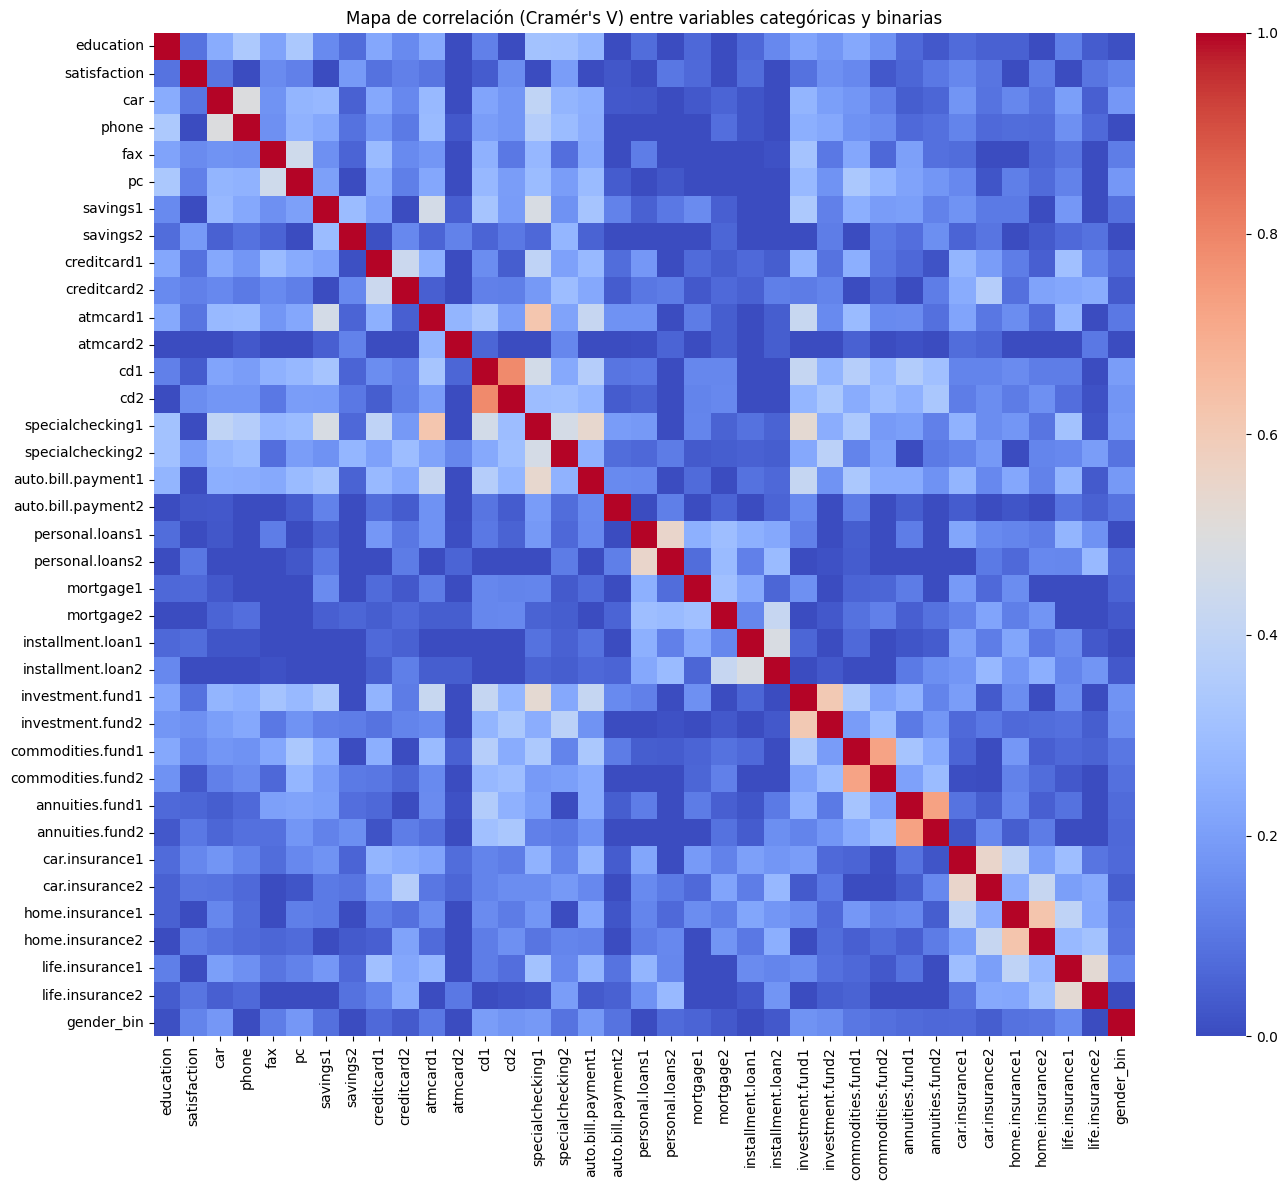

Columnas con varianza casi nula (≥ 95% del mismo valor):
  - mortgage2: proporción = 0.986
  - installment.loan1: proporción = 0.958
  - installment.loan2: proporción = 0.986

 Variables binarias conservadas tras limpieza:
['car', 'phone', 'fax', 'pc', 'savings1', 'savings2', 'creditcard1', 'creditcard2', 'atmcard1', 'atmcard2', 'cd1', 'cd2', 'specialchecking1', 'specialchecking2', 'auto.bill.payment1', 'auto.bill.payment2', 'personal.loans1', 'personal.loans2', 'mortgage1', 'investment.fund1', 'investment.fund2', 'commodities.fund1', 'commodities.fund2', 'annuities.fund1', 'annuities.fund2', 'car.insurance1', 'car.insurance2', 'home.insurance1', 'home.insurance2', 'life.insurance1', 'life.insurance2', 'gender_bin']

 No se detectaron pares de variables binarias con Cramér's V ≥ 0.85.

 Columnas finales en X (predictoras):
['education', 'age', 'car', 'phone', 'fax', 'pc', 'pincome', 'savings1', 'savings2', 'creditcard1', 'creditcard2', 'atmcard1', 'atmcard2', 'cd1', 'cd2', 'specialchec

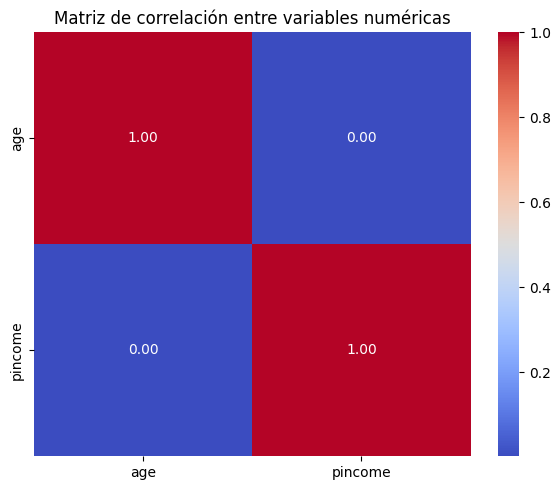

In [ ]:
# ========================================
# LIBRERÍAS
# ========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

# ========================================
# FUNCIONES AUXILIARES
# ========================================

# Cálculo de Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# ========================================
# MATRIZ DE CRAMÉR'S V (categorical + binarias)
# ========================================

# Variables categóricas y binarias
cat_vars = ['education', 'satisfaction'] + variables_binarias

# Matriz vacía
cramers_results = pd.DataFrame(index=cat_vars, columns=cat_vars)

# Cálculo de Cramér's V entre pares
for var1 in cat_vars:
    for var2 in cat_vars:
        try:
            cramers_results.loc[var1, var2] = cramers_v(df_analisis[var1], df_analisis[var2])
        except:
            cramers_results.loc[var1, var2] = np.nan

cramers_results = cramers_results.astype(float)

# Visualización
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_results, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlación (Cramér's V) entre variables categóricas y binarias")
plt.tight_layout()
plt.show()


# Variables numéricas
num_vars = ['age', 'pincome']

# Matriz de correlación numérica (Pearson o Spearman)
num_corr = df_analisis[num_vars].corr(method='pearson')  # Cambia a 'spearman' si no hay linealidad

# Visualización
plt.figure(figsize=(6, 5))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()


# ========================================
# FILTRO DE VARIABLES BINARIAS: VARIANZA CERCANA A CERO
# ========================================

# Detectar columnas binarias con varianza ≥ 95%
umbral_varianza = 0.95
cols_baja_varianza = [
    (col, df_analisis[col].value_counts(normalize=True).max())
    for col in variables_binarias
    if df_analisis[col].value_counts(normalize=True).max() >= umbral_varianza
]

if cols_baja_varianza:
    print("Columnas con varianza casi nula (≥ 95% del mismo valor):")
    for col, prop in cols_baja_varianza:
        print(f"  - {col}: proporción = {prop:.3f}")
else:
    print(" No se detectaron columnas binarias con varianza ≥ 0.95.\n")

# Variables con varianza casi nula a eliminar manualmente
cols_ruido = ['mortgage2', 'installment.loan1', 'installment.loan2']

# nuevo DataFrame sin esas variables
df_modelo = df_analisis.drop(columns=cols_ruido)

# Variables binarias finales conservadas
binarias_finales = [col for col in variables_binarias if col in df_modelo.columns]
print("\n Variables binarias conservadas tras limpieza:")
print(binarias_finales)

# ========================================
# DETECCIÓN DE BINARIAS REDUNDANTES (Cramér’s V ≥ 0.85)
# ========================================
redundantes = []
for i, col1 in enumerate(binarias_finales):
    for col2 in binarias_finales[i+1:]:
        v = cramers_v(df_modelo[col1], df_modelo[col2])
        if v >= 0.85:
            redundantes.append((col1, col2, round(v, 3)))

if redundantes:
    print("\n Pares de variables binarias con asociación muy alta (Cramér's V ≥ 0.85):")
    for c1, c2, v in redundantes:
        print(f"  - {c1} ↔ {c2}: V = {v}")
else:
    print("\n No se detectaron pares de variables binarias con Cramér's V ≥ 0.85.")

# ========================================
# SPLIT FINAL PARA MODELADO
# ========================================

# Variables predictoras finales
X = df_modelo.drop(columns=['satisfaction', 'gender'])  # gender ya reemplazada por gender_bin
y = df_modelo['satisfaction']

print("\n Columnas finales en X (predictoras):")
print(X.columns.tolist())

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=40,
    stratify=y
)



# Classification Model Analysis for Customer Satisfaction Prediction

---

## Decision Tree Models

The basic decision tree model showed limited performance, with an accuracy of 0.42. Its strongest results were for class 4, corresponding to very satisfied customers, with 39 correct predictions. However, it made many errors when classifying classes 1 and 2, which are associated with lower satisfaction levels. This behavior is mainly explained by class imbalance in the data, since most observations belonged to class 4.

Although the variable types (numerical, ordinal, and binary) were respected, the model did not manage to properly capture the patterns of the less represented classes.

---

When pruning was applied using a `ccp_alpha` value optimized through cross-validation, overall accuracy improved to 0.50. This adjustment allowed better classification of classes 3 and 4, although class 2 continued to be poorly identified (0 correct predictions).

In this model, the variable `age` stood out as one of the most relevant predictors, together with some binary variables such as `fax` and investment fund indicators. This highlighted that certain numerical and binary variables contributed more value than others when segmenting the data.

---

To improve fairness across classes, a model was trained using balanced class weights (`class_weight='balanced'`), which shifted the model’s focus toward less frequent classes. Although accuracy decreased to 0.35, greater sensitivity toward class 2 and a more uniform distribution of errors were observed.

However, by introducing additional variables with low importance, some noise may have been added, which could have negatively affected performance. Even so, variables such as income, age, and education maintained their influence.

---

The final model combined three strategies: pruning, class balancing, and the exclusive use of variables with significant importance. Although global accuracy remained at 0.35, the model was clearer, more interpretable, and more coherent.

It retained key variables such as income, age, education, and some relevant binary indicators like `auto.bill.payment2` and `savings2`, which enabled a cleaner and more problem-oriented approach.

---

Beyond overall metrics, the analysis of confusion matrices revealed important differences between models. The basic tree frequently confused classes 3 and 4, reflecting a bias toward the majority class.

The pruned tree partially corrected this issue, although it completely failed to detect class 2.

The balanced model achieved a more even distribution of errors, improving detection of less frequent classes, although at the cost of lower overall accuracy.

These differences show how class imbalance handling directly influences the model’s ability to represent all satisfaction categories fairly.

---

Regarding variable contributions, numerical features such as age and income were the most consistent across all models, since they allow natural splits that facilitate segmentation.

For example, `age` frequently appeared as the root node, indicating its strong relationship with the target variable.

Ordinal variables such as education were also very useful when their internal hierarchy was respected, allowing the tree to generate more coherent splits and improving generalization.

---

Binary variables showed more varied behavior. Some, such as `fax`, `auto.bill.payment2`, and `savings2`, proved useful and were retained in the more refined models.

Others were removed due to low variance or weak relationships with the target variable, which helped reduce noise and improve interpretability.

An important advantage of decision trees is that they can naturally handle this mixed type of variables without requiring additional transformations.

---

## Conclusions

In conclusion, the correct classification and encoding of variables from the beginning was fundamental for building more interpretable and effective models.

The combined use of pruning, class balancing, and important feature selection allowed the development of more balanced models, even in the presence of imbalanced data.

Although metrics such as accuracy or F1-score did not reach high levels, the process made it possible to identify key factors influencing banking customer satisfaction and to establish a solid foundation for future models using more robust algorithms or refined tuning.


Accuracy árbol de decisión: 0.42


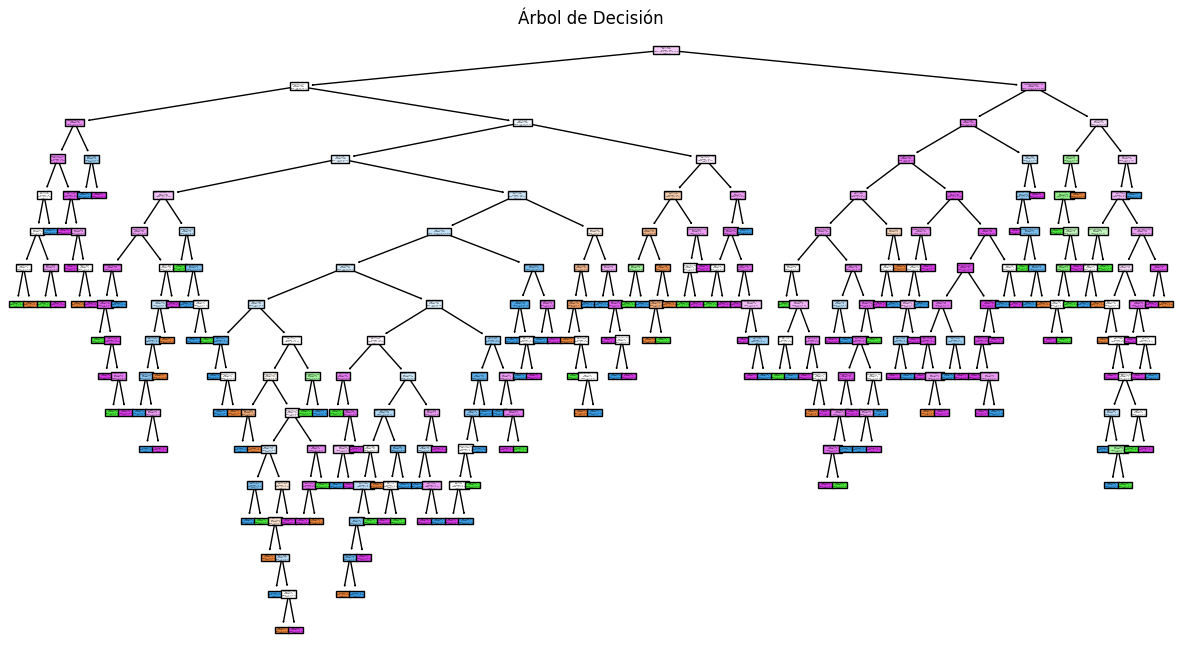

== Árbol de Decisión ==
              precision    recall  f1-score   support

           1       0.31      0.26      0.29        19
           2       0.14      0.19      0.16        16
           3       0.37      0.36      0.37        44
           4       0.57      0.55      0.56        71

    accuracy                           0.42       150
   macro avg       0.35      0.34      0.34       150
weighted avg       0.43      0.42      0.42       150

Kappa: 0.1330631767753937


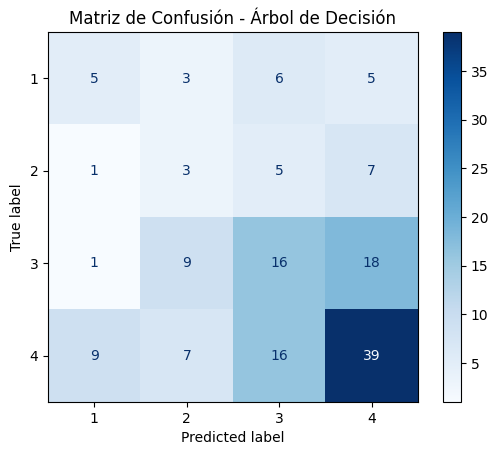

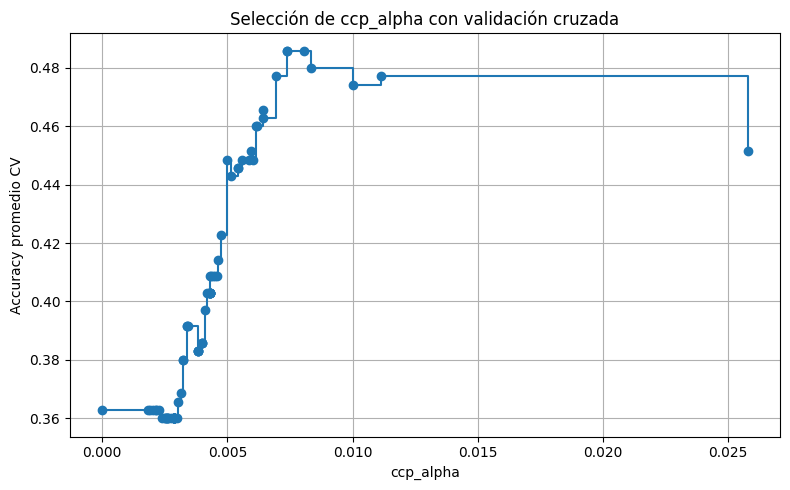

Mejor ccp_alpha: 0.00737 con accuracy CV: 0.4857


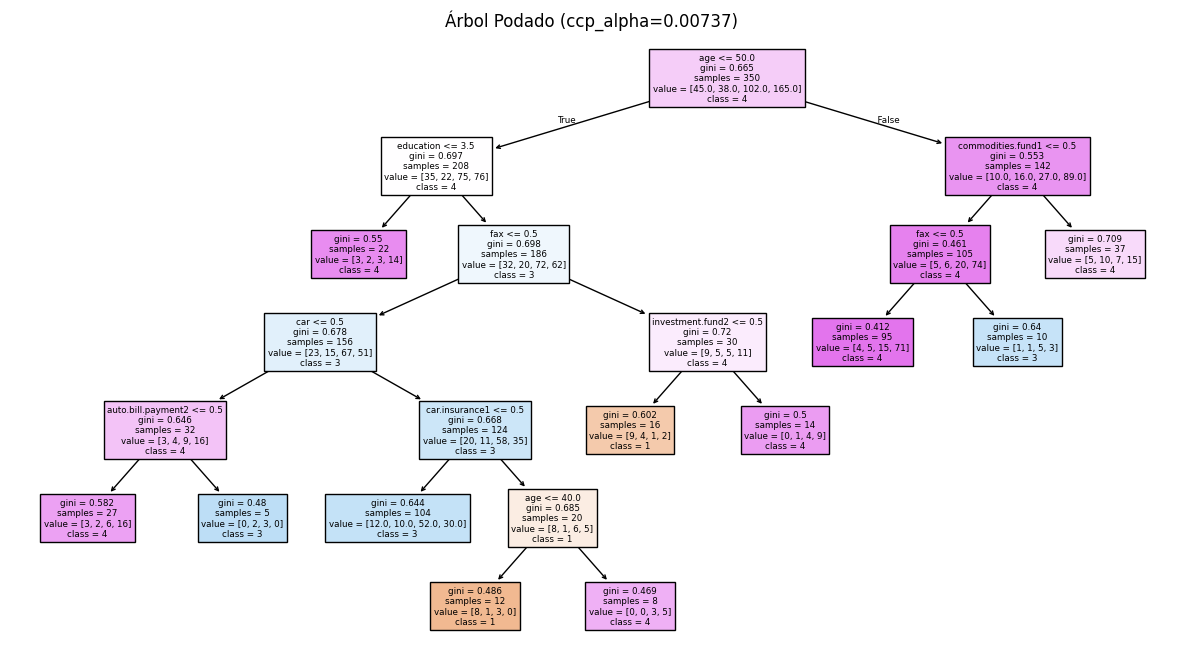

== Árbol Podado ==
              precision    recall  f1-score   support

           1       0.40      0.21      0.28        19
           2       0.00      0.00      0.00        16
           3       0.43      0.48      0.45        44
           4       0.55      0.70      0.62        71

    accuracy                           0.50       150
   macro avg       0.34      0.35      0.34       150
weighted avg       0.44      0.50      0.46       150

Kappa: 0.17841232746658875


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


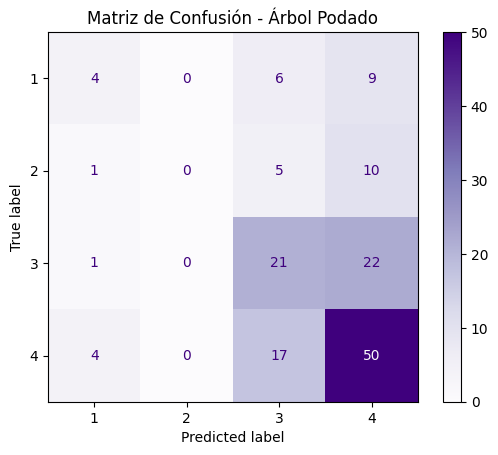

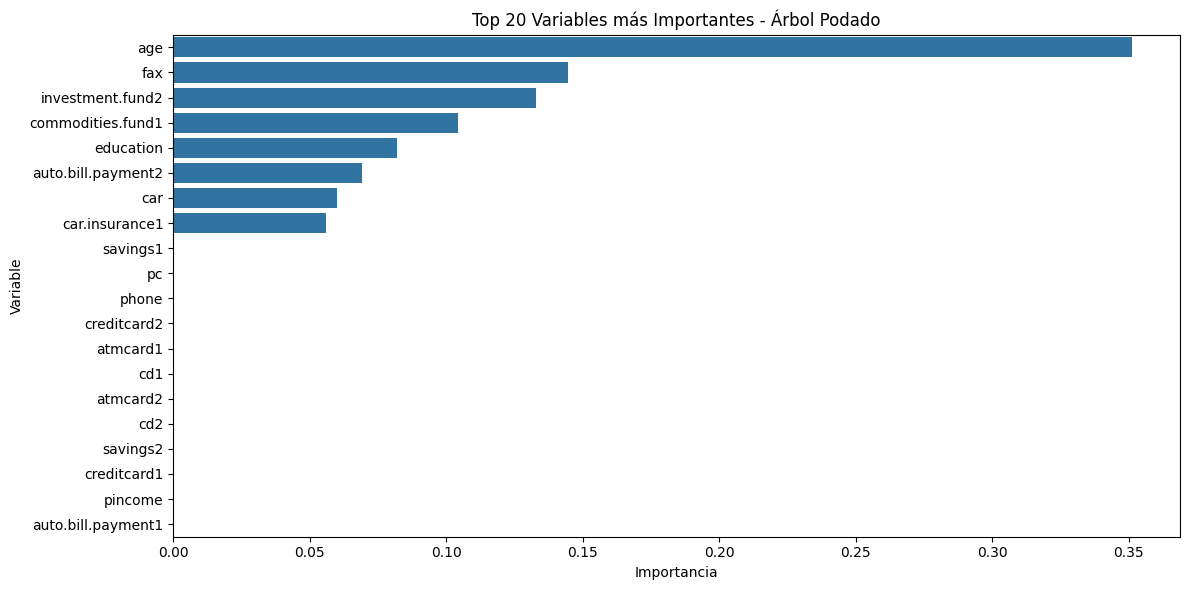

== Árbol de Decisión Balanceado ==
              precision    recall  f1-score   support

           1       0.27      0.21      0.24        19
           2       0.05      0.06      0.05        16
           3       0.32      0.30      0.31        44
           4       0.49      0.49      0.49        71

    accuracy                           0.35       150
   macro avg       0.28      0.27      0.27       150
weighted avg       0.36      0.35      0.36       150

Kappa: 0.0265605138154813


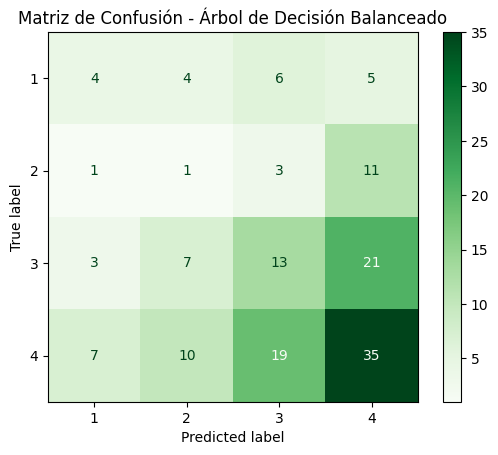

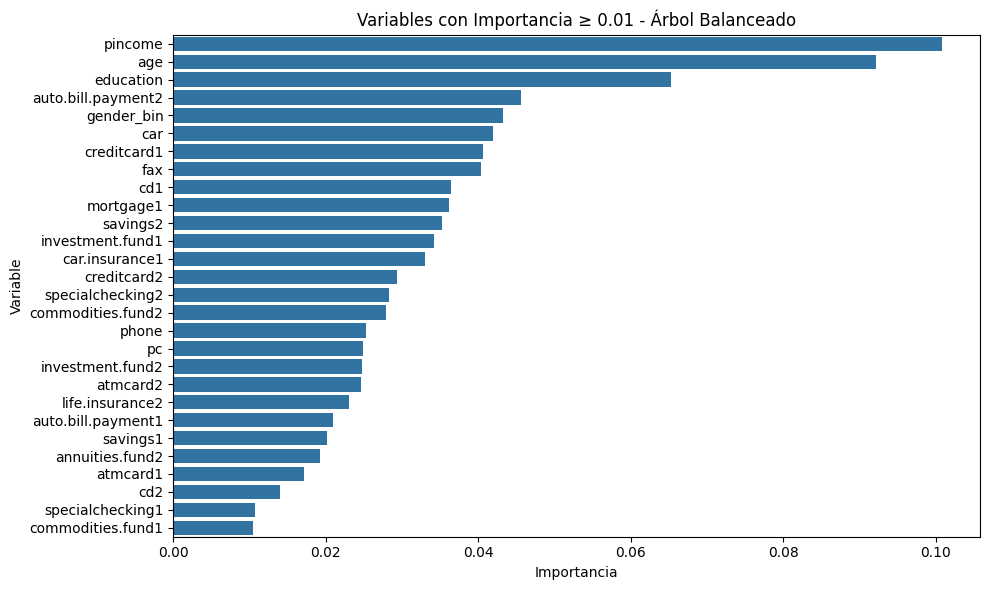

== Árbol Podado con Variables Importantes y Pesos Balanceados ==
              precision    recall  f1-score   support

           1       0.29      0.21      0.24        19
           2       0.09      0.12      0.11        16
           3       0.29      0.32      0.30        44
           4       0.48      0.45      0.47        71

    accuracy                           0.35       150
   macro avg       0.29      0.28      0.28       150
weighted avg       0.36      0.35      0.35       150

Kappa: 0.02545743834526648


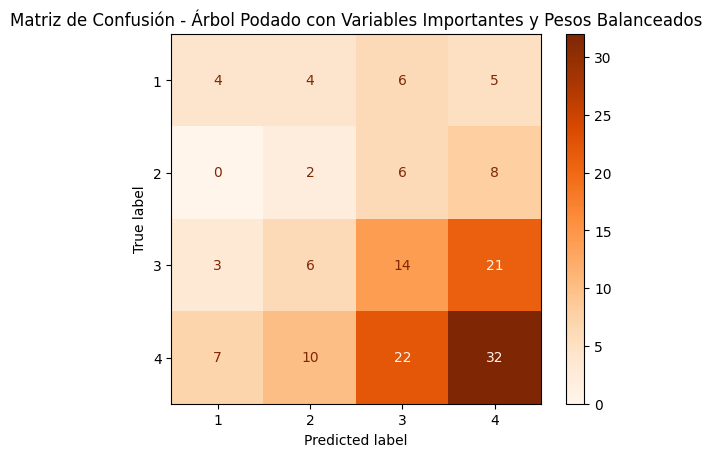

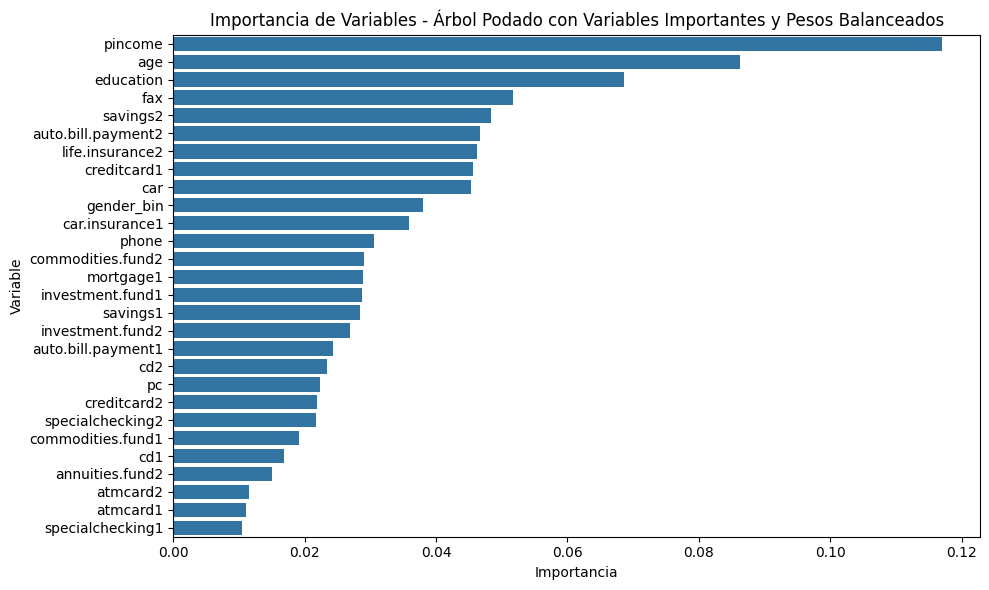


 Resultados almacenados:
accuracy_arbol_basico: 0.4200
f1_arbol_basico: 0.4246
kappa_arbol_basico: 0.1331
accuracy_arbol_podado: 0.5000
f1_arbol_podado: 0.4596
kappa_arbol_podado: 0.1784
accuracy_arbol_balanceado: 0.3533
f1_arbol_balanceado: 0.3568
kappa_arbol_balanceado: 0.0266
accuracy_arbol_importante_balanceado: 0.3467
f1_arbol_importante_balanceado: 0.3523
kappa_arbol_importante_balanceado: 0.0255


In [ ]:
# ==============================================
# 1. Importación de librerías
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    f1_score, cohen_kappa_score
)

# ==============================================
# 2. Preparación de datos
# ==============================================
# Reutilizamos X_train, X_test, y_train, y_test, df_modelo, X, y
class_names = [str(cls) for cls in sorted(y.unique())]

# ==============================================
# Función auxiliar para evaluar modelos
# ==============================================
def evaluar_modelo(nombre, modelo, X_test, y_test, y_pred, cmap="Blues"):
    print(f"== {nombre} ==")
    print(classification_report(y_test, y_pred))
    print("Kappa:", cohen_kappa_score(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=cmap)
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# ==============================================
# 3. Árbol de decisión básico
# ==============================================
tree_model = DecisionTreeClassifier(random_state=40)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print(f'Accuracy árbol de decisión: {tree_model.score(X_test, y_test):.2f}')
plt.figure(figsize=(15, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Árbol de Decisión")
plt.show()

evaluar_modelo("Árbol de Decisión", tree_model, X_test, y_test, y_pred_tree, cmap="Blues")

# ==============================================
# 4. Árbol de decisión podado (búsqueda de ccp_alpha)
# ==============================================
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

cv_scores = [
    cross_val_score(DecisionTreeClassifier(random_state=40, ccp_alpha=alpha),
                    X_train, y_train, cv=5).mean()
    for alpha in ccp_alphas
]

best_index = np.argmax(cv_scores)
best_ccp_alpha = ccp_alphas[best_index]

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, cv_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy promedio CV")
plt.title("Selección de ccp_alpha con validación cruzada")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Mejor ccp_alpha: {best_ccp_alpha:.5f} con accuracy CV: {cv_scores[best_index]:.4f}")

pruned_tree_model = DecisionTreeClassifier(random_state=40, ccp_alpha=best_ccp_alpha)
pruned_tree_model.fit(X_train, y_train)
y_pred_pruned = pruned_tree_model.predict(X_test)

plt.figure(figsize=(15, 8))
plot_tree(pruned_tree_model, filled=True, feature_names=X.columns, class_names=class_names)
plt.title(f"Árbol Podado (ccp_alpha={best_ccp_alpha:.5f})")
plt.show()

evaluar_modelo("Árbol Podado", pruned_tree_model, X_test, y_test, y_pred_pruned, cmap="Purples")

# Importancia de variables - Árbol Podado
importances_tree = pruned_tree_model.feature_importances_
tree_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances_tree
}).sort_values(by='Importancia', ascending=False)

top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(data=tree_importance_df.head(top_n), x='Importancia', y='Variable')
plt.title(f"Top {top_n} Variables más Importantes - Árbol Podado")
plt.tight_layout()
plt.show()

# ==============================================
# 5. Árbol de decisión balanceado
# ==============================================
balanced_tree = DecisionTreeClassifier(random_state=40, class_weight='balanced')
balanced_tree.fit(X_train, y_train)
y_pred_bal = balanced_tree.predict(X_test)

evaluar_modelo("Árbol de Decisión Balanceado", balanced_tree, X_test, y_test, y_pred_bal, cmap="Greens")

# ==============================================
# 6. Filtrar variables con importancia significativa (≥ 0.01)
# ==============================================
importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': balanced_tree.feature_importances_
}).sort_values(by='Importancia', ascending=False)

filtered_vars = importance_df[importance_df['Importancia'] >= 0.01]['Variable']
X_train_filtered = X_train[filtered_vars]
X_test_filtered = X_test[filtered_vars]

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df[importance_df['Importancia'] >= 0.01], x='Importancia', y='Variable')
plt.title("Variables con Importancia ≥ 0.01 - Árbol Balanceado")
plt.tight_layout()
plt.show()

# ==============================================
# 7. Árbol podado con variables filtradas y pesos balanceados
# ==============================================
tree_temp = DecisionTreeClassifier(random_state=40, class_weight='balanced')
tree_temp.fit(X_train_filtered, y_train)

path = tree_temp.cost_complexity_pruning_path(X_train_filtered, y_train)
ccp_alphas_f = path.ccp_alphas

cv_scores_f = [
    cross_val_score(DecisionTreeClassifier(random_state=40, ccp_alpha=alpha, class_weight='balanced'),
                    X_train_filtered, y_train, cv=5).mean()
    for alpha in ccp_alphas_f
]

best_index_f = np.argmax(cv_scores_f)
best_ccp_alpha_f = ccp_alphas_f[best_index_f]

final_model = DecisionTreeClassifier(random_state=40, ccp_alpha=best_ccp_alpha_f, class_weight='balanced')
final_model.fit(X_train_filtered, y_train)
y_pred_final = final_model.predict(X_test_filtered)

evaluar_modelo("Árbol Podado con Variables Importantes y Pesos Balanceados", final_model,
               X_test_filtered, y_test, y_pred_final, cmap="Oranges")


# ==============================================
# Importancia de variables - Árbol Final Filtrado y Balanceado
# ==============================================
final_importance_df = pd.DataFrame({
    'Variable': X_train_filtered.columns,
    'Importancia': final_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=final_importance_df, x='Importancia', y='Variable')
plt.title("Importancia de Variables - Árbol Podado con Variables Importantes y Pesos Balanceados")
plt.tight_layout()
plt.show()



# ==============================================
# 8. Almacenamiento de métricas clave
# ==============================================
from collections import OrderedDict

results = OrderedDict({
    "accuracy_arbol_basico": accuracy_score(y_test, y_pred_tree),
    "f1_arbol_basico": f1_score(y_test, y_pred_tree, average='weighted'),
    "kappa_arbol_basico": cohen_kappa_score(y_test, y_pred_tree),

    "accuracy_arbol_podado": accuracy_score(y_test, y_pred_pruned),
    "f1_arbol_podado": f1_score(y_test, y_pred_pruned, average='weighted'),
    "kappa_arbol_podado": cohen_kappa_score(y_test, y_pred_pruned),

    "accuracy_arbol_balanceado": accuracy_score(y_test, y_pred_bal),
    "f1_arbol_balanceado": f1_score(y_test, y_pred_bal, average='weighted'),
    "kappa_arbol_balanceado": cohen_kappa_score(y_test, y_pred_bal),

    "accuracy_arbol_importante_balanceado": accuracy_score(y_test, y_pred_final),
    "f1_arbol_importante_balanceado": f1_score(y_test, y_pred_final, average='weighted'),
    "kappa_arbol_importante_balanceado": cohen_kappa_score(y_test, y_pred_final)
})


print("\n Resultados almacenados:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")





## Random Forest Model

The basic Random Forest model reached an accuracy of 0.46, only slightly higher than the original decision tree, although it showed clear limitations. While it predicted class 4 (very satisfied customers) more effectively, with 53 correct cases, it struggled significantly with classes 1, 2, and 3. In particular, class 2 was mostly confused with class 4.

This is reflected in the normalized confusion matrix, where more than 70% of the records for classes 2 and 3 were misclassified. Although variable types were properly respected during training, class imbalance continued to affect the predictive ability of the model.

It is worth noting that Random Forest is an ensemble model based on the bagging technique. Unlike a single decision tree, this approach builds multiple trees on random subsets of the dataset and combines their predictions, reducing overfitting and improving stability. However, its performance can be limited when classes are imbalanced or when the feature set includes less relevant variables.

---

To improve performance, the GridSearchCV technique was applied to tune hyperparameters. The process explored different combinations of tree depth, number of estimators, and number of variables considered at each split.

The optimal configuration consisted of 300 trees, a maximum depth of 15, and 3 variables per node. This tuned model achieved an accuracy of 0.49, with notable improvements in predicting class 4 (61 correct cases) and a slight increase in class 3 performance. However, class 2 was once again not correctly identified, showing that hyperparameter tuning alone did not fully solve the imbalance issue.

---

In a subsequent stage, a model with balanced classes was trained by assigning weights inversely proportional to class frequencies. This variant maintained a similar accuracy (0.47) but achieved a better distribution of predictions across minority classes.

Class 1 showed a slight improvement, while classes 2 and 3 continued to be problematic. Feature importance analysis revealed that `age`, `pincome`, and `education` remained the most influential variables, highlighting the value of numerical and ordinal features.

Some binary variables also gained relevance, such as `gender_bin`, `savings2`, and `specialchecking2`, possibly due to their relationship with more satisfied customers.

---

Seeking greater simplicity and easier interpretation, a filtered version of the balanced model was built by removing variables whose importance was below 0.01. This strategy reduced noise and prevented the model from considering irrelevant features.

The result was a more compact model focused on the most influential variables, without sacrificing accuracy, which remained at 0.46. Key variables such as `age`, `pincome`, and `education` were retained, along with some useful binary indicators like `savings2`, `auto.bill.payment1`, and `creditcard1`.

This selection facilitated later analysis by working with a smaller and more meaningful set of predictors.

---

Across all developed models, the type of each variable was carefully respected, which was crucial for correct model behavior. Numerical variables proved to be the most consistent in predicting satisfaction levels, while `education`, treated as an ordinal variable, also made a strong contribution, likely due to its relationship with customers’ financial knowledge.

Binary variables showed more heterogeneous behavior: some related to banking products or services were informative, while others only added complexity without improving performance.

---

## Conclusions

In conclusion, Random Forest models provided a moderate improvement over decision trees, especially after applying techniques such as hyperparameter optimization, class balancing, and feature selection.

Although overall accuracy did not exceed 50%, the process made it possible to clearly identify which variables add value when predicting banking customer satisfaction.

The combination of ensemble methods, careful feature treatment, and appropriate filtering proved key to building more robust, interpretable models focused on the truly relevant factors in the analysis.


== Random Forest ==
              precision    recall  f1-score   support

           1       0.62      0.26      0.37        19
           2       0.25      0.06      0.10        16
           3       0.30      0.23      0.26        44
           4       0.50      0.75      0.60        71

    accuracy                           0.46       150
   macro avg       0.42      0.32      0.33       150
weighted avg       0.43      0.46      0.42       150



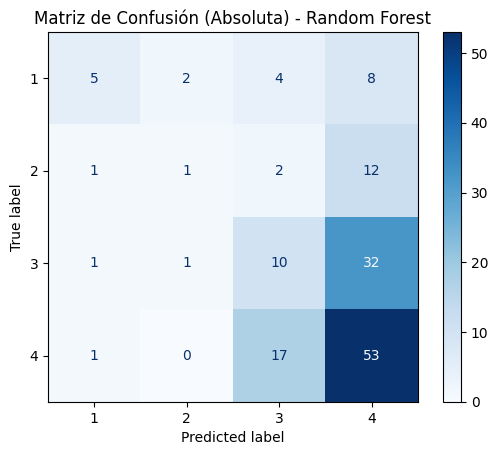

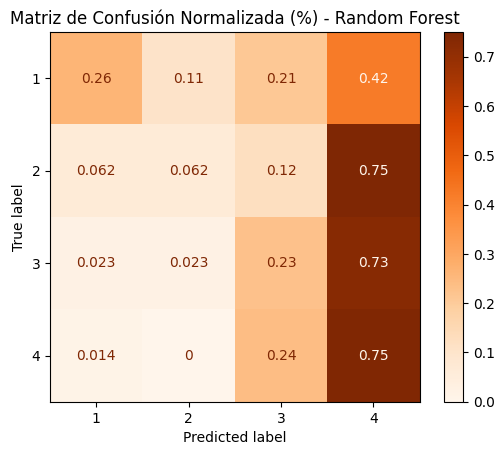

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'max_depth': 15, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 300}
== Mejor Modelo (Random Forest + GridSearch) ==
              precision    recall  f1-score   support

           1       0.83      0.26      0.40        19
           2       0.00      0.00      0.00        16
           3       0.33      0.18      0.24        44
           4       0.51      0.86      0.64        71

    accuracy                           0.49       150
   macro avg       0.42      0.33      0.32       150
weighted avg       0.44      0.49      0.42       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


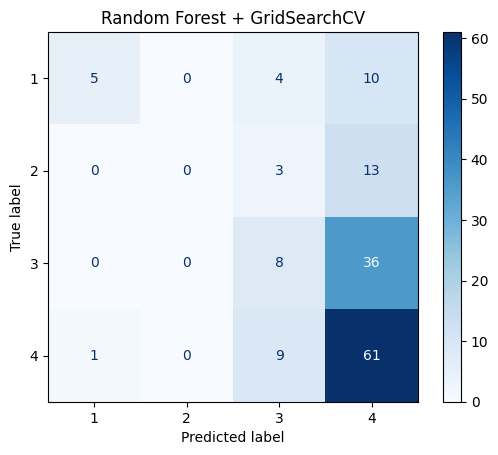


== Resumen de Métricas ==
                              Accuracy  Precision  Recall  F1-Score   Kappa
Árbol de Decisión               0.4200     0.4308  0.4200    0.4246  0.1331
Árbol Podado                    0.5000     0.4365  0.5000    0.4596  0.1784
Random Forest                   0.4600     0.4336  0.4600    0.4188  0.0917
Random Forest + GridSearchCV    0.4933     0.4439  0.4933    0.4220  0.1101


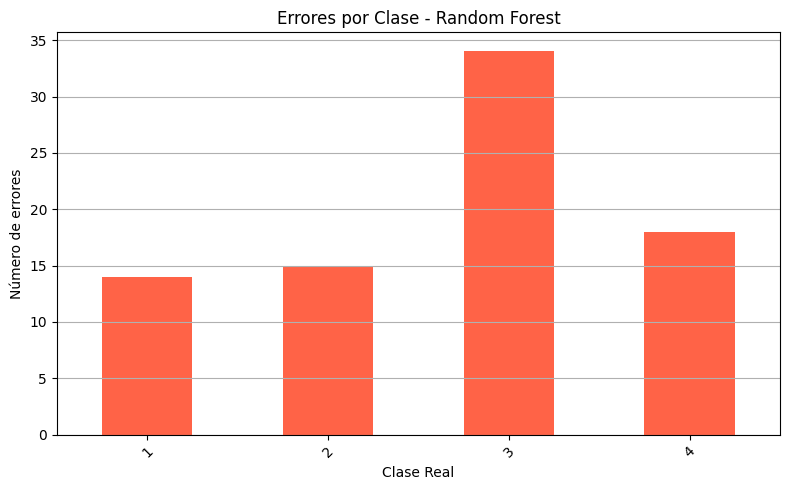

/tmp/ipython-input-4-3473542867.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


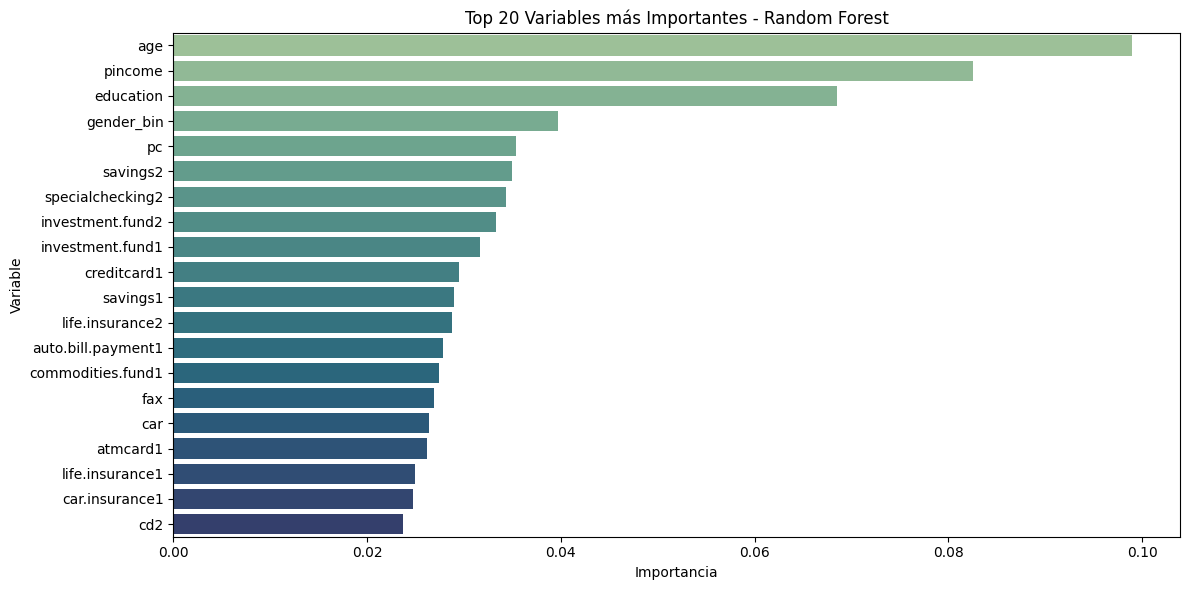

== Random Forest con Pesos Balanceados ==
              precision    recall  f1-score   support

           1       0.67      0.21      0.32        19
           2       0.17      0.06      0.09        16
           3       0.31      0.23      0.26        44
           4       0.52      0.77      0.62        71

    accuracy                           0.47       150
   macro avg       0.42      0.32      0.32       150
weighted avg       0.44      0.47      0.42       150



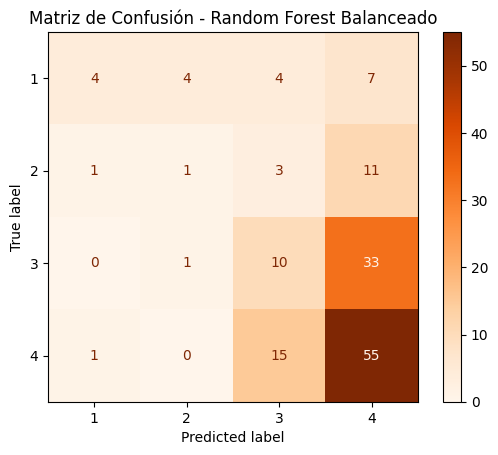

/tmp/ipython-input-4-3473542867.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_bal_df.head(top_n), x='Importancia', y='Variable', palette='flare')


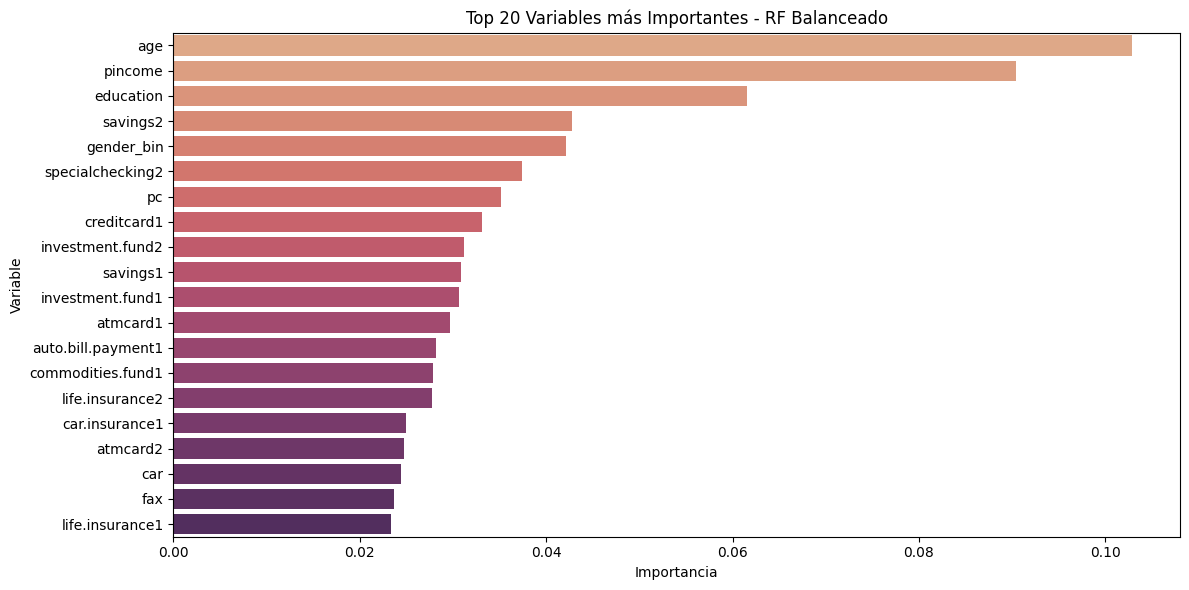


 Variables con baja importancia (< 0.01):
           Variable  Importancia
20  personal.loans2     0.009084
19  personal.loans1     0.008975
29   car.insurance2     0.008869
27  annuities.fund2     0.008151
31  home.insurance2     0.006242
== Random Forest Balanceado con Variables Filtradas ==
              precision    recall  f1-score   support

           1       0.62      0.26      0.37        19
           2       0.00      0.00      0.00        16
           3       0.29      0.23      0.26        44
           4       0.51      0.76      0.61        71

    accuracy                           0.46       150
   macro avg       0.36      0.31      0.31       150
weighted avg       0.41      0.46      0.41       150



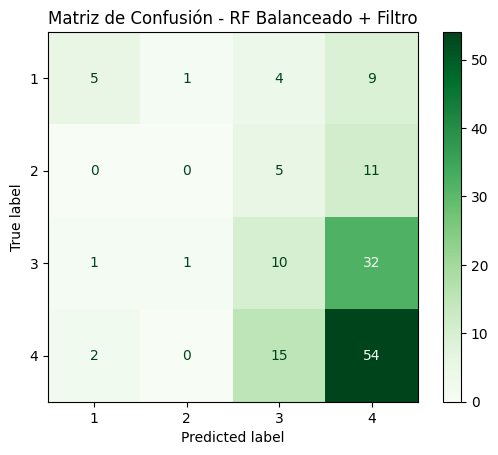

/tmp/ipython-input-4-3473542867.py:219: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_filtrado_df.head(top_n), x='Importancia', y='Variable', palette='crest')


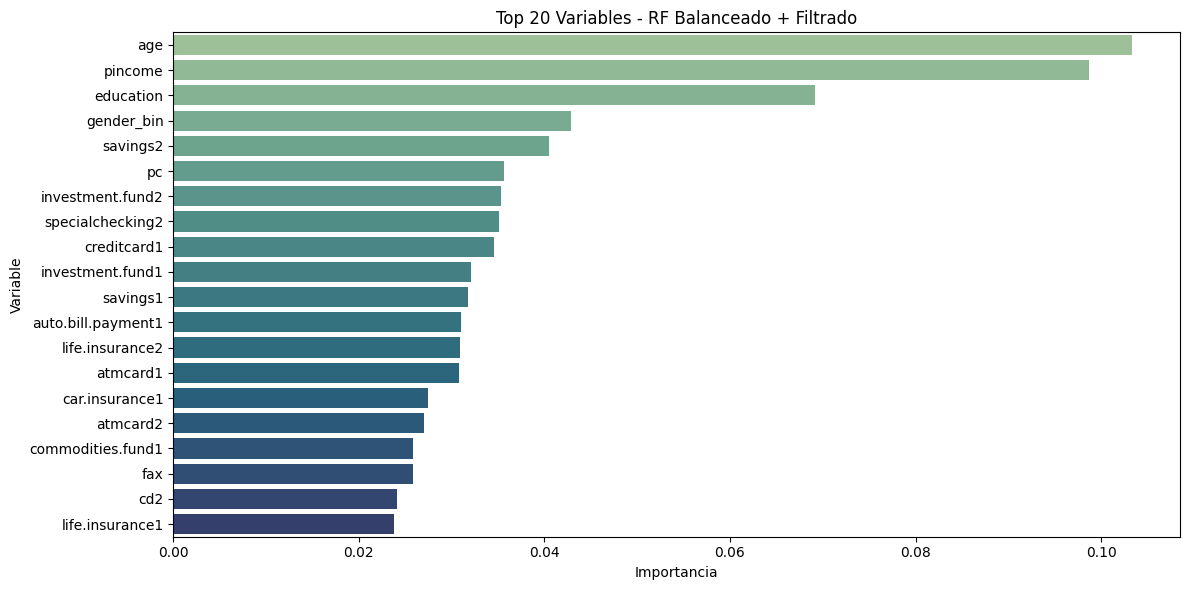


== Resumen Completo de Métricas hasta ahora ==
                              Accuracy  Precision  Recall  F1-Score   Kappa
Árbol de Decisión               0.4200     0.4308  0.4200    0.4246  0.1331
Árbol Podado                    0.5000     0.4365  0.5000    0.4596  0.1784
Random Forest                   0.4600     0.4336  0.4600    0.4188  0.0917
Random Forest + GridSearchCV    0.4933     0.4439  0.4933    0.4220  0.1101
RF Balanceado                   0.4667     0.4395  0.4667    0.4216  0.1015
RF Balanceado + Filtro          0.4600     0.4066  0.4600    0.4109  0.0861


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay,
    accuracy_score, f1_score, cohen_kappa_score,
    precision_score, recall_score
)


# ==============================================
# 5. Random Forest básico
# ==============================================
rf_model = RandomForestClassifier(n_estimators=100, random_state=40)
rf_model.fit(X_train, y_train)

# Predicción en X_test
y_pred_rf = rf_model.predict(X_test)

print("== Random Forest ==")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión con conteo absoluto
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Matriz de Confusión (Absoluta) - Random Forest")
plt.show()

# Matriz de confusión normalizada (porcentaje por fila)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    cmap="Oranges",
    normalize='true'
)
plt.title("Matriz de Confusión Normalizada (%) - Random Forest")
plt.show()

# ==============================================
# 6. Búsqueda de hiperparámetros (GridSearchCV) para Random Forest
# ==============================================
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [3, 5, 7, 'sqrt'],
    'max_depth': [None, 10, 15],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=40),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predicción del mejor modelo sobre X_test
y_pred_best = best_model.predict(X_test)

print("== Mejor Modelo (Random Forest + GridSearch) ==")
print(classification_report(y_test, y_pred_best))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap="Blues")
plt.title("Random Forest + GridSearchCV")
plt.show()

# ==============================================
# 7. Resumen de Métricas
# ==============================================
metrics_summary = {}

def compute_metrics(y_true, y_pred, model_name):
    metrics_summary[model_name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, average='weighted', zero_division=0),
        'Kappa': cohen_kappa_score(y_true, y_pred)
    }

compute_metrics(y_test, y_pred_tree, "Árbol de Decisión")
compute_metrics(y_test, y_pred_pruned, "Árbol Podado")
compute_metrics(y_test, y_pred_rf, "Random Forest")
compute_metrics(y_test, y_pred_best, "Random Forest + GridSearchCV")

metrics_df = pd.DataFrame(metrics_summary).T.round(4)

print("\n== Resumen de Métricas ==")
print(metrics_df)

# ==============================================
# 8. Análisis de errores y importancia de variables (Random Forest)
# ==============================================
errors = (y_pred_rf != y_test)
error_counts = pd.Series(y_test[errors]).value_counts().sort_index()

plt.figure(figsize=(8, 5))
error_counts.plot(kind='bar', color='tomato')
plt.title("Errores por Clase - Random Forest")
plt.xlabel("Clase Real")
plt.ylabel("Número de errores")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

importances = best_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
})

feature_importance_df = feature_importance_df[
    ~feature_importance_df['Variable'].str.lower().str.contains('id|unnamed')
]

feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(
    data=feature_importance_df.head(top_n),
    x='Importancia',
    y='Variable',
    palette='crest'
)
plt.title(f"Top {top_n} Variables más Importantes - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# =============================
# 9. Random Forest Balanceado
# =============================
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=40,
    class_weight='balanced'
)
rf_balanced.fit(X_train, y_train)
y_pred_rf_bal = rf_balanced.predict(X_test)

print("== Random Forest con Pesos Balanceados ==")
print(classification_report(y_test, y_pred_rf_bal))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_bal, cmap="Oranges")
plt.title("Matriz de Confusión - Random Forest Balanceado")
plt.show()

# Importancia de variables
importances_bal = rf_balanced.feature_importances_
rf_bal_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances_bal
}).sort_values(by='Importancia', ascending=False)

# Mostrar top 20
top_n = 20
plt.figure(figsize=(12, 6))
sns.barplot(data=rf_bal_df.head(top_n), x='Importancia', y='Variable', palette='flare')
plt.title(f"Top {top_n} Variables más Importantes - RF Balanceado")
plt.tight_layout()
plt.show()

# Mostrar variables con baja importancia (< 0.01)
print("\n Variables con baja importancia (< 0.01):")
print(rf_bal_df[rf_bal_df['Importancia'] < 0.01])


# =============================
# 10. RF Balanceado con Filtro
# =============================

# Filtrar variables significativas
variables_utiles_rf = rf_bal_df[rf_bal_df['Importancia'] >= 0.01]['Variable'].tolist()
X_reducido_rf = X[variables_utiles_rf]

# Nuevo split con variables filtradas
X_train_rf_red, X_test_rf_red, y_train_rf_red, y_test_rf_red = train_test_split(
    X_reducido_rf, y, test_size=0.3, random_state=40, stratify=y
)

# Entrenar Random Forest balanceado con datos reducidos
rf_filtrado = RandomForestClassifier(
    n_estimators=100,
    random_state=40,
    class_weight='balanced'
)
rf_filtrado.fit(X_train_rf_red, y_train_rf_red)
y_pred_rf_filtrado = rf_filtrado.predict(X_test_rf_red)

# Evaluación
print("== Random Forest Balanceado con Variables Filtradas ==")
print(classification_report(y_test_rf_red, y_pred_rf_filtrado))

ConfusionMatrixDisplay.from_predictions(y_test_rf_red, y_pred_rf_filtrado, cmap="Greens")
plt.title("Matriz de Confusión - RF Balanceado + Filtro")
plt.show()

# Nueva importancia de variables
importances_rf_filtrado = rf_filtrado.feature_importances_
rf_filtrado_df = pd.DataFrame({
    'Variable': X_reducido_rf.columns,
    'Importancia': importances_rf_filtrado
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=rf_filtrado_df.head(top_n), x='Importancia', y='Variable', palette='crest')
plt.title(f"Top {top_n} Variables - RF Balanceado + Filtrado")
plt.tight_layout()
plt.show()


# =============================
# 11. Agregar métricas finales
# =============================
compute_metrics(y_test, y_pred_rf_bal, "RF Balanceado")
compute_metrics(y_test_rf_red, y_pred_rf_filtrado, "RF Balanceado + Filtro")

metrics_df = pd.DataFrame(metrics_summary).T.round(4)
print("\n== Resumen Completo de Métricas hasta ahora ==")
print(metrics_df)


## Neural Network

Finally, a multilayer perceptron (MLP) neural network model was built to predict the satisfaction variable, which had an uneven distribution across classes 1, 2, 3, and 4.

To improve training quality, the SMOTE technique was applied, which generates new synthetic observations for minority classes. This created a more balanced training set, helping the model avoid favoring the most frequent classes and achieve better performance for categories with fewer observations.

---

GridSearchCV was used to search for the best hyperparameter combination for the model, always respecting the golden rule of machine learning: the test set must not be touched until the very end.

The grid tested four configurations for the number of neurons in the hidden layer and five values of the regularization parameter `alpha`, resulting in 20 combinations. With 5-fold cross-validation, 100 training runs were performed on the balanced training data (350 observations), without using any information from the test set.

This approach helped control overfitting. A grid that is too large can lead the model to learn patterns that only work well in the training data but do not generalize. In this case, the number of combinations was reasonable, which helped find an effective configuration without forcing the model.

The best combination turned out to be `hidden_layer_sizes=(10,)` and `alpha=2.0`.

---

For the predictive variables, the most important ones according to the balanced decision tree were selected, which had identified attributes such as `pincome`, `age`, `education`, and `auto.bill.payment2` as having significant importance.

An importance threshold greater than or equal to 0.01 was applied to keep only those variables that truly contributed to the model. This reduced noise, improved performance, and helped avoid an unnecessarily complex model.

---

The neural network was configured with the logistic activation function (also known as sigmoid), following an approach similar to the `nnet` model in R.

Although the response variable has an order (it is ordinal), it was treated as a multi-class classification problem. This is because the `MLPClassifier` can handle this type of task well by using an output layer that computes the probability of each class without requiring an explicit ordering between them.

---

Final results were positive. The model achieved an accuracy of 43%, a macro F1-score of 0.40, and a macro AUC of 0.642.

ROC curves showed particularly good performance for classes 1 (AUC = 0.74) and 2 (AUC = 0.65), while class 4 also reached an acceptable AUC (0.62).

The learning curve showed a moderate separation between training and validation performance, without large gaps, which indicates that there are no clear signs of overfitting.

Overall, the model achieved a good balance between accuracy, generalization, and simplicity, especially considering the limited size of the dataset and the difficulty of the problem.


Tamaño entrenamiento: 350
Tamaño prueba: 150
Fitting 5 folds for each of 20 candidates, totalling 100 fits
== Mejor combinación de hiperparámetros ==
{'mlp__alpha': 2.0, 'mlp__hidden_layer_sizes': (10,)}

== Classification Report ==
              precision    recall  f1-score   support

           1       0.29      0.42      0.34        19
           2       0.40      0.38      0.39        16
           3       0.33      0.36      0.35        44
           4       0.59      0.49      0.54        71

    accuracy                           0.43       150
   macro avg       0.40      0.41      0.40       150
weighted avg       0.46      0.43      0.44       150



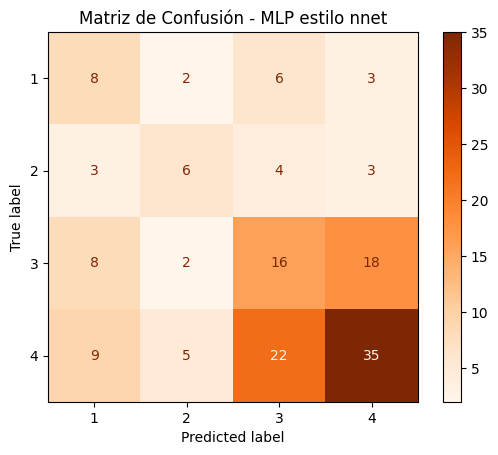

AUC macro: 0.642


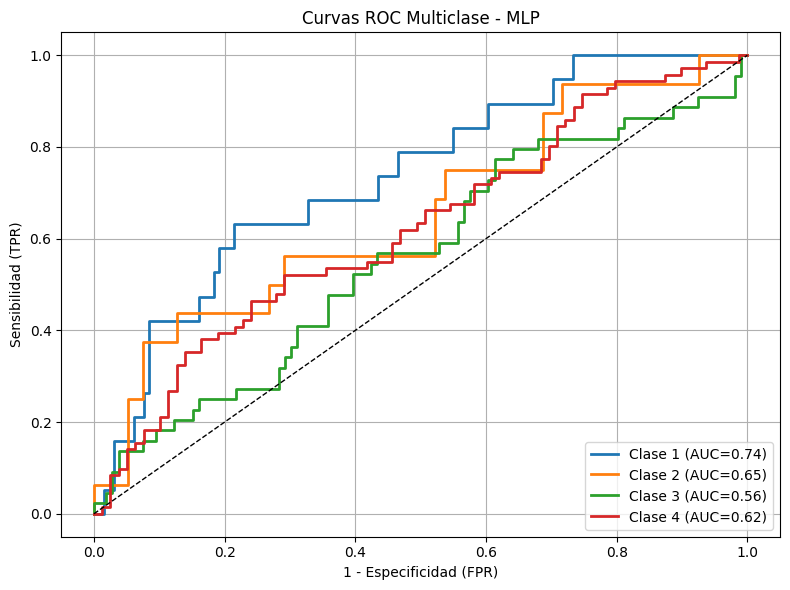

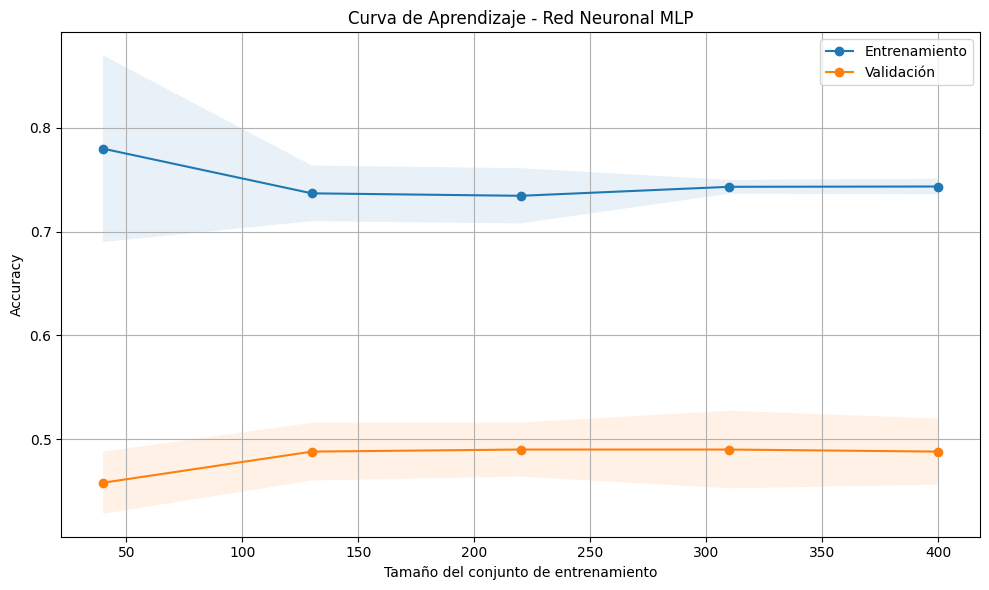

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Variables importantes (según arbol decisión balanceado con importancia ≥ 0.01)
variables_importantes = [
    'pincome', 'age', 'education', 'auto.bill.payment2', 'gender_bin',
    'car', 'creditcard1', 'fax', 'cd1', 'mortgage1', 'savings2',
    'investment.fund1', 'car.insurance1', 'creditcard2', 'specialchecking2',
    'commodities.fund2', 'phone', 'pc', 'investment.fund2', 'atmcard2',
    'life.insurance2', 'auto.bill.payment1', 'savings1', 'annuities.fund2',
    'atmcard1', 'cd2', 'specialchecking1', 'commodities.fund1'
]

# 2. Subset del dataset
X_nn = X[variables_importantes].copy()
y_nn = y.copy()


# 3. División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_nn, y_nn,
    test_size=0.30,
    stratify=y_nn,
    random_state=42
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

# 4. Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 5. Pipeline con MLP estilo `nnet`
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        activation='logistic',
        solver='lbfgs',
        max_iter=2000,
        random_state=42
    ))
])

# 6. Grid de hiperparámetros
param_grid = {
    'mlp__hidden_layer_sizes': [(3,), (5,), (8,), (10,)],
    'mlp__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# 7. GridSearchCV con validación cruzada
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    verbose=1
)

# 8. Entrenamiento
grid.fit(X_train_bal, y_train_bal)

# 9. Evaluación
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)

print("== Mejor combinación de hiperparámetros ==")
print(grid.best_params_)

print("\n== Classification Report ==")
print(classification_report(y_test, y_pred))

# 10. Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Oranges")
plt.title("Matriz de Confusión - MLP estilo nnet")
plt.show()

# 11. AUC macro
class_names = [str(cls) for cls in np.unique(y_train)]
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
roc_auc = roc_auc_score(y_test_bin, y_proba, average='macro', multi_class='ovr')
print("AUC macro:", round(roc_auc, 3))

# 12. Curvas ROC
fpr, tpr, roc_auc_dict = {}, {}, {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, color in zip(range(len(class_names)), plt.cm.tab10.colors):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"Clase {class_names[i]} (AUC={roc_auc_dict[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('1 - Especificidad (FPR)')
plt.ylabel('Sensibilidad (TPR)')
plt.title('Curvas ROC Multiclase - MLP')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# 13. Curva de aprendizaje
best_model = grid.best_estimator_
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,
    X=X_nn, y=y_nn,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje - Red Neuronal MLP")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.grid(True)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', label="Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', label="Validación")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [ ]:
# Consolidación de todas las métricas
import pandas as pd
import numpy as np

# Diccionario base con métricas desde modelos anteriores
resumen_metricas = {
    "Árbol de Decisión": {
        "Accuracy": results["accuracy_arbol_basico"],
        "F1-Score": results["f1_arbol_basico"],
        "Kappa": results["kappa_arbol_basico"],
        "Precision": precision_score(y_test, y_pred_tree, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_tree, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Árbol Podado": {
        "Accuracy": results["accuracy_arbol_podado"],
        "F1-Score": results["f1_arbol_podado"],
        "Kappa": results["kappa_arbol_podado"],
        "Precision": precision_score(y_test, y_pred_pruned, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_pruned, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Árbol Balanceado": {
        "Accuracy": results["accuracy_arbol_balanceado"],
        "F1-Score": results["f1_arbol_balanceado"],
        "Kappa": results["kappa_arbol_balanceado"],
        "Precision": precision_score(y_test, y_pred_bal, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_bal, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Árbol Balanceado + Filtro": {
        "Accuracy": results["accuracy_arbol_importante_balanceado"],
        "F1-Score": results["f1_arbol_importante_balanceado"],
        "Kappa": results["kappa_arbol_importante_balanceado"],
        "Precision": precision_score(y_test, y_pred_final, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_final, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "F1-Score": f1_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        "Kappa": cohen_kappa_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Random Forest + GridSearch": {
        "Accuracy": accuracy_score(y_test, y_pred_best),
        "F1-Score": f1_score(y_test, y_pred_best, average='weighted', zero_division=0),
        "Kappa": cohen_kappa_score(y_test, y_pred_best),
        "Precision": precision_score(y_test, y_pred_best, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_best, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "RF Balanceado": {
        "Accuracy": accuracy_score(y_test, y_pred_rf_bal),
        "F1-Score": f1_score(y_test, y_pred_rf_bal, average='weighted', zero_division=0),
        "Kappa": cohen_kappa_score(y_test, y_pred_rf_bal),
        "Precision": precision_score(y_test, y_pred_rf_bal, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred_rf_bal, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "RF Balanceado + Filtro": {
        "Accuracy": accuracy_score(y_test_rf_red, y_pred_rf_filtrado),
        "F1-Score": f1_score(y_test_rf_red, y_pred_rf_filtrado, average='weighted', zero_division=0),
        "Kappa": cohen_kappa_score(y_test_rf_red, y_pred_rf_filtrado),
        "Precision": precision_score(y_test_rf_red, y_pred_rf_filtrado, average='weighted', zero_division=0),
        "Recall": recall_score(y_test_rf_red, y_pred_rf_filtrado, average='weighted', zero_division=0),
        "ROC-AUC": np.nan
    },
    "Red Neuronal MLP + SMOTE": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),
        "Kappa": cohen_kappa_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "ROC-AUC": roc_auc  # calculado previamente
    }
}

# Convertir a DataFrame
df_resumen_metricas = pd.DataFrame(resumen_metricas).T.round(4)

# Mostrar resumen final
print(" Comparación de Métricas de Todos los Modelos:")
display(df_resumen_metricas)




 Comparación de Métricas de Todos los Modelos:


,Accuracy,F1-Score,Kappa,Precision,Recall,ROC-AUC
Árbol de Decisión,0.4200,0.4246,0.1331,0.3417,0.3333,NaN
Árbol Podado,0.5000,0.4596,0.1784,0.3910,0.4533,NaN
Árbol Balanceado,0.3533,0.3568,0.0266,0.3850,0.3867,NaN
Árbol Balanceado + Filtro,0.3467,0.3523,0.0255,0.3652,0.3600,NaN
Random Forest,0.4333,0.3916,0.0469,0.3973,0.4333,NaN
Random Forest + GridSearch,0.4333,0.3567,0.0047,0.3398,0.4333,NaN
RF Balanceado,0.4267,0.3776,0.0341,0.3747,0.4267,NaN
RF Balanceado + Filtro,0.4600,0.4109,0.0861,0.4066,0.4600,NaN
Red Neuronal MLP + SMOTE,0.4333,0.4413,0.1735,0.4574,0.4333,0.6423


## Final Conclusions and Model Comparison

Choosing the best model to classify customer satisfaction should not be based on a single metric such as accuracy alone. It is important to consider whether easy interpretability is required, whether balanced overall performance is desired, or whether correctly identifying all categories — including the least represented ones — is a priority.

In this project, different models were compared using metrics such as F1-score, Cohen’s Kappa, and AUC, which provide a more complete view of performance.

---

If an easily explainable model is needed, the pruned decision tree is a good option. This model achieved the highest accuracy and the largest Kappa value, indicating strong agreement between predictions and observed outcomes.

In addition, its structure is simple to visualize and understand, which makes it useful in contexts where model transparency is important or when presenting results to non-technical stakeholders.

---

On the other hand, if improving overall performance — especially in the presence of underrepresented classes — is the main goal, the MLP neural network trained with SMOTE stands out as an interesting alternative.

This model achieved the highest F1-score and showed a reasonable ability to distinguish between all classes, as reflected by its AUC of 0.64. Although its structure is harder to interpret, it can be a good choice when the objective is to achieve a better balance between precision and coverage across all satisfaction levels.


### Model Selection Depending on Business Goals

- If interpretability is required, the pruned decision tree is preferred due to its transparency and strong overall performance.
- If balanced detection across classes is more important, the MLP with SMOTE offers better discrimination.
- For production systems, ensemble methods combined with class-weighting or boosting algorithms could further improve performance.
